In [116]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsapi

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

import warnings
warnings.filterwarnings('ignore')

In [117]:
import datetime

yesterday = (datetime.datetime.today() - datetime.timedelta(days = 1)).strftime("%m_%d_%Y")
today = datetime.datetime.today().strftime("%m_%d_%Y")

In [118]:
hits = pd.concat([pd.read_csv("data/player_stats/player_stats_08_06_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_05_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_06_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_07_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_08_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_09_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_14_2019.csv"),
                  pd.read_csv("data/player_stats/player_stats_08_15_2019.csv")
                 ], sort=False)

In [119]:
hits.set_index(np.arange(len(hits)), inplace=True)

In [120]:
hits['player_got_hit'] = hits['player_got_hit'].apply(float)

In [121]:
hits

,Name,ID,Team,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,...,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand,player_got_hit
0,Brandon Dixon,641525,116,81.0,46.0,32.0,12.0,3.0,14.0,87.0,...,1.54,0.20,5.0,0.200,1.0,0.333,0.933,0.600,0.0,1.0
1,Dawel Lugo,608475,116,31.0,31.0,6.0,0.0,3.0,1.0,21.0,...,1.54,0.20,3.0,0.333,1.0,0.333,0.666,0.333,0.0,1.0
2,Gordon Beckham,493596,116,66.0,41.0,22.0,11.0,2.0,5.0,60.0,...,1.54,0.20,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0
3,Harold Castro,605612,116,55.0,60.0,17.0,6.0,3.0,2.0,49.0,...,1.54,0.20,6.0,0.500,3.0,0.500,1.000,0.500,1.0,1.0
4,JaCoby Jones,592444,116,87.0,66.0,39.0,19.0,3.0,11.0,93.0,...,1.54,0.20,6.0,0.000,0.0,0.000,0.000,0.000,0.0,1.0
5,Jake Rogers,668670,116,7.0,5.0,5.0,0.0,0.0,2.0,8.0,...,1.54,0.20,2.0,0.500,1.0,0.500,2.500,2.000,0.0,1.0
6,John Hicks,543308,116,69.0,55.0,19.0,11.0,0.0,7.0,74.0,...,1.54,0.20,5.0,0.200,1.0,0.200,0.400,0.200,0.0,1.0
7,Jordy Mercer,474568,116,42.0,40.0,11.0,8.0,0.0,5.0,29.0,...,1.54,0.20,1.0,0.000,0.0,0.500,0.500,0.000,0.0,0.0
8,Miguel Cabrera,408234,116,100.0,93.0,29.0,16.0,0.0,7.0,79.0,...,1.54,0.20,0.0,0.000,0.0,0.000,0.000,0.000,0.0,0.0
9,Niko Goodrum,592348,116,101.0,71.0,54.0,24.0,4.0,10.0,123.0,...,1.54,0.20,3.0,0.333,1.0,0.600,1.267,0.667,1.0,1.0


In [122]:
data = hits.iloc[:, 3:-1]
data

,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,baseOnBalls,intentionalWalks,hits,...,walksPer9Inn_p5G,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand
0,81.0,46.0,32.0,12.0,3.0,14.0,87.0,15.0,0.0,70.0,...,3.54,1.54,0.20,5.0,0.200,1.0,0.333,0.933,0.600,0.0
1,31.0,31.0,6.0,0.0,3.0,1.0,21.0,2.0,0.0,20.0,...,3.54,1.54,0.20,3.0,0.333,1.0,0.333,0.666,0.333,0.0
2,66.0,41.0,22.0,11.0,2.0,5.0,60.0,12.0,0.0,38.0,...,3.54,1.54,0.20,0.0,0.000,0.0,0.000,0.000,0.000,0.0
3,55.0,60.0,17.0,6.0,3.0,2.0,49.0,6.0,0.0,55.0,...,3.54,1.54,0.20,6.0,0.500,3.0,0.500,1.000,0.500,1.0
4,87.0,66.0,39.0,19.0,3.0,11.0,93.0,27.0,2.0,70.0,...,3.54,1.54,0.20,6.0,0.000,0.0,0.000,0.000,0.000,0.0
5,7.0,5.0,5.0,0.0,0.0,2.0,8.0,4.0,0.0,5.0,...,3.54,1.54,0.20,2.0,0.500,1.0,0.500,2.500,2.000,0.0
6,69.0,55.0,19.0,11.0,0.0,7.0,74.0,12.0,0.0,48.0,...,3.54,1.54,0.20,5.0,0.200,1.0,0.200,0.400,0.200,0.0
7,42.0,40.0,11.0,8.0,0.0,5.0,29.0,8.0,1.0,36.0,...,3.54,1.54,0.20,1.0,0.000,0.0,0.500,0.500,0.000,0.0
8,100.0,93.0,29.0,16.0,0.0,7.0,79.0,32.0,2.0,104.0,...,3.54,1.54,0.20,0.0,0.000,0.0,0.000,0.000,0.000,0.0
9,101.0,71.0,54.0,24.0,4.0,10.0,123.0,43.0,1.0,96.0,...,3.54,1.54,0.20,3.0,0.333,1.0,0.600,1.267,0.667,1.0


In [123]:
labels = hits.iloc[:, -1]
labels

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
5       1.0
6       1.0
7       0.0
8       0.0
9       1.0
10      0.0
11      1.0
12      1.0
13      0.0
14      0.0
15      0.0
16      1.0
17      1.0
18      0.0
19      1.0
20      1.0
21      1.0
22      1.0
23      1.0
24      1.0
25      1.0
26      1.0
27      1.0
28      1.0
29      0.0
       ... 
2604    0.0
2605    0.0
2606    1.0
2607    0.0
2608    0.0
2609    1.0
2610    0.0
2611    0.0
2612    0.0
2613    1.0
2614    1.0
2615    0.0
2616    1.0
2617    1.0
2618    0.0
2619    1.0
2620    1.0
2621    0.0
2622    0.0
2623    1.0
2624    1.0
2625    0.0
2626    1.0
2627    0.0
2628    0.0
2629    0.0
2630    0.0
2631    1.0
2632    1.0
2633    1.0
Name: player_got_hit, Length: 2634, dtype: float64

In [124]:
# data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size=0.2)
data_train, data_val, labels_train, labels_val = train_test_split(data, labels, test_size=0.2)

In [125]:
np.mean(labels_train == 0)

0.5011865211200759

In [126]:
np.mean(labels_train == 1)

0.49881347887992405

In [127]:
hits.columns

Index(['Name', 'ID', 'Team', 'gamesPlayed', 'groundOuts', 'runs', 'doubles',
       'triples', 'homeRuns', 'strikeOuts', 'baseOnBalls', 'intentionalWalks',
       'hits', 'hitByPitch', 'avg', 'atBats', 'obp', 'slg', 'ops',
       'caughtStealing', 'stolenBases', 'stolenBasePercentage',
       'groundIntoDoublePlay', 'numberOfPitches', 'plateAppearances',
       'totalBases', 'rbi', 'leftOnBase', 'sacBunts', 'sacFlies', 'babip',
       'groundOutsToAirouts', 'atBatsPerHomeRun', 'atBatsPerHomeRun_p7G',
       'avg_p7G', 'hits_p7G', 'obp_p7G', 'ops_p7G', 'slg_p7G',
       'atBatsPerHomeRun_p15G', 'avg_p15G', 'hits_p15G', 'obp_p15G',
       'ops_p15G', 'slg_p15G', 'avg_p5G', 'era_p5G', 'groundOutsToAirouts_p5G',
       'hitsPer9Inn_p5G', 'homeRunsPer9_p5G', 'inningsPitched_p5G',
       'pitchesPerInning_p5G', 'runsScoredPer9_p5G',
       'stolenBasePercentage_p5G', 'strikePercentage_p5G',
       'strikeoutWalkRatio_p5G', 'strikeoutsPer9Inn_p5G', 'walksPer9Inn_p5G',
       'whip_p5G', 'winP

In [128]:
sns.set(font_scale=1.5)

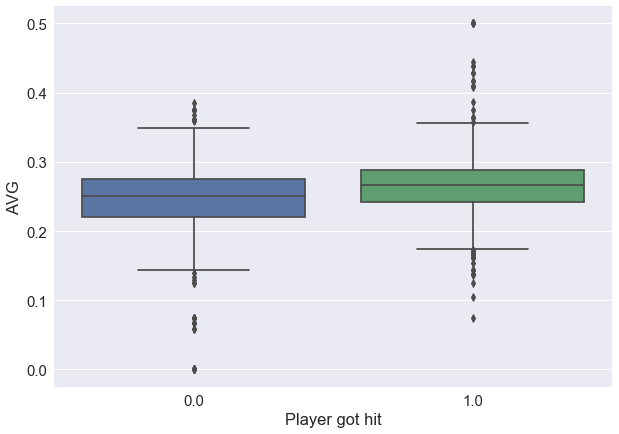

In [129]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg", data=hits)
ax.set(xlabel="Player got hit", ylabel="AVG")
plt.show()

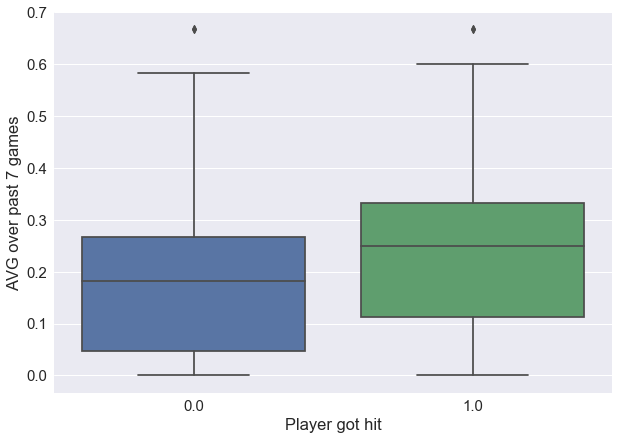

In [130]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg_p7G", data=hits)
ax.set(xlabel="Player got hit", ylabel="AVG over past 7 games")
plt.show()

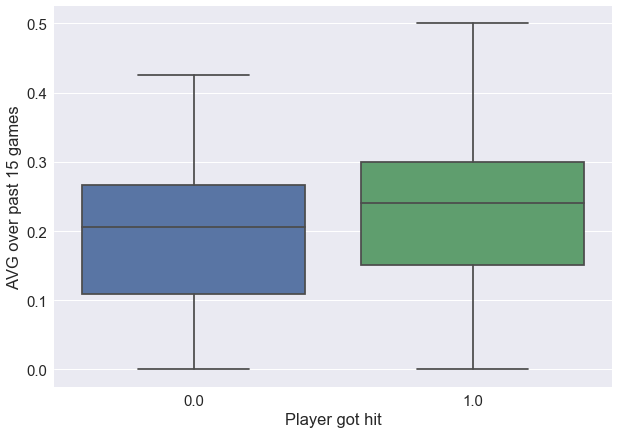

In [131]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg_p15G", data=hits)
ax.set(xlabel="Player got hit", ylabel="AVG over past 15 games")
plt.show()

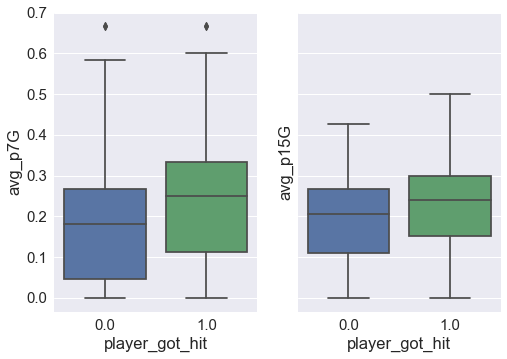

In [132]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
sns.boxplot(x = "player_got_hit", y = "avg_p7G", data=hits, ax=ax1)
sns.boxplot(x = "player_got_hit", y = "avg_p15G", data=hits, ax=ax2)

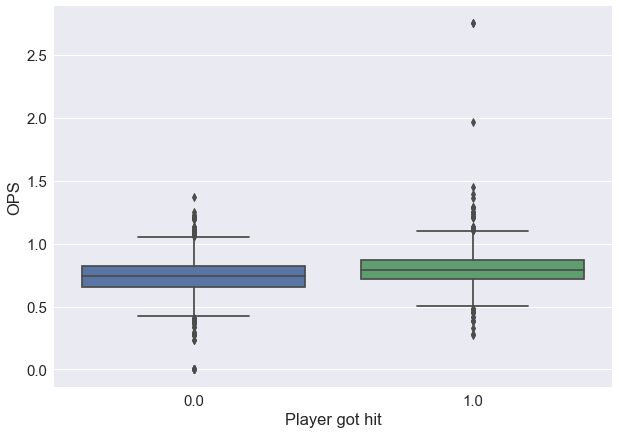

In [133]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "ops", data=hits)
ax.set(xlabel="Player got hit", ylabel="OPS")
plt.show()

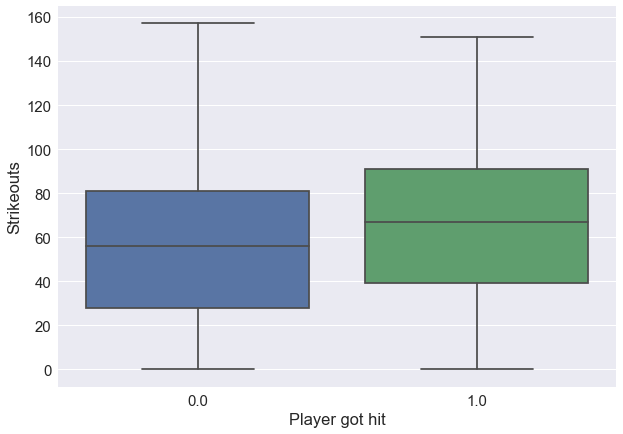

In [134]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "strikeOuts", data=hits)
ax.set(xlabel="Player got hit", ylabel="Strikeouts")
plt.show()

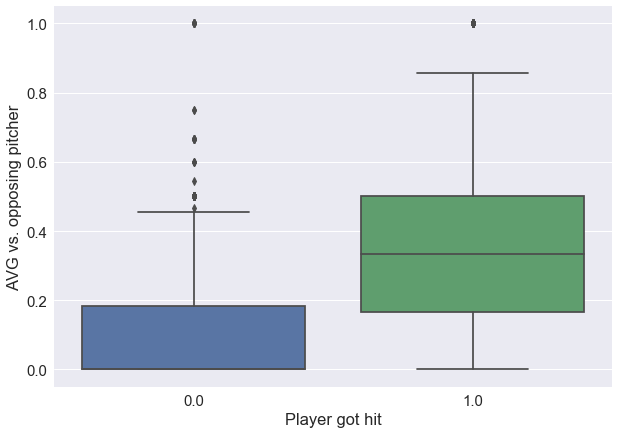

In [135]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg_h2h", data=hits)
ax.set(xlabel="Player got hit", ylabel="AVG vs. opposing pitcher")
plt.show()

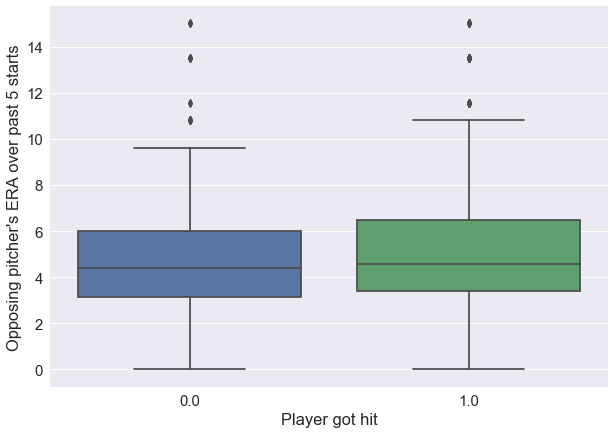

In [136]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "era_p5G", data=hits)
ax.set(xlabel="Player got hit", ylabel="Opposing pitcher's ERA over past 5 starts")
plt.show()

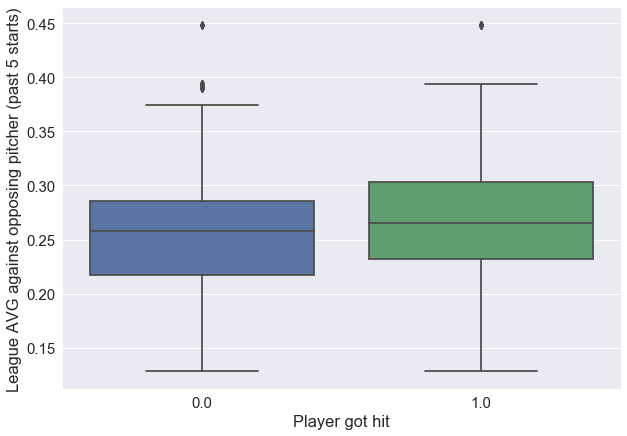

In [137]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "avg_p5G", data=hits)
ax.set(xlabel="Player got hit", ylabel="League AVG against opposing pitcher (past 5 starts)")
plt.show()

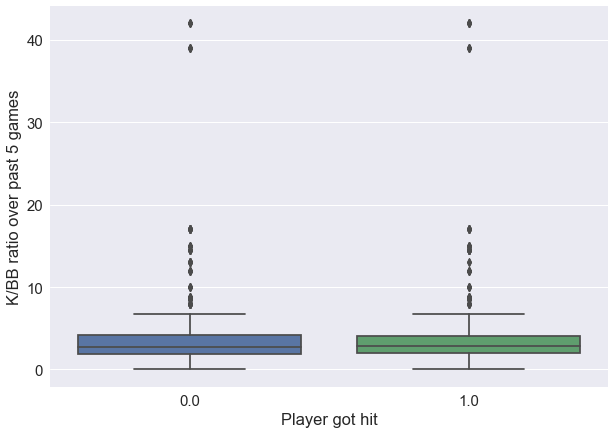

In [138]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "strikeoutWalkRatio_p5G", data=hits)
ax.set(xlabel="Player got hit", ylabel="K/BB ratio over past 5 games")
plt.show()

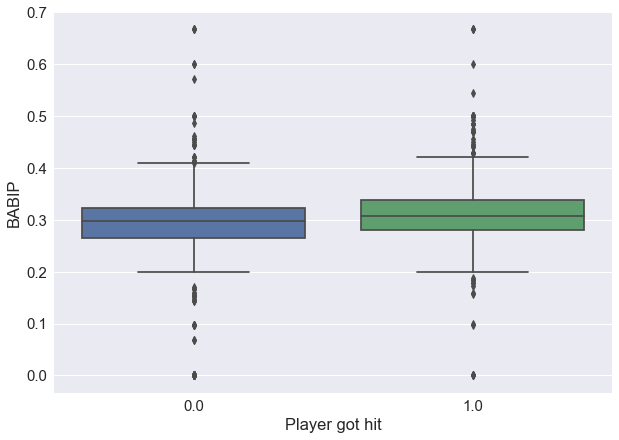

In [139]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "player_got_hit", y = "babip", data=hits)
ax.set(xlabel="Player got hit", ylabel="BABIP")
plt.show()

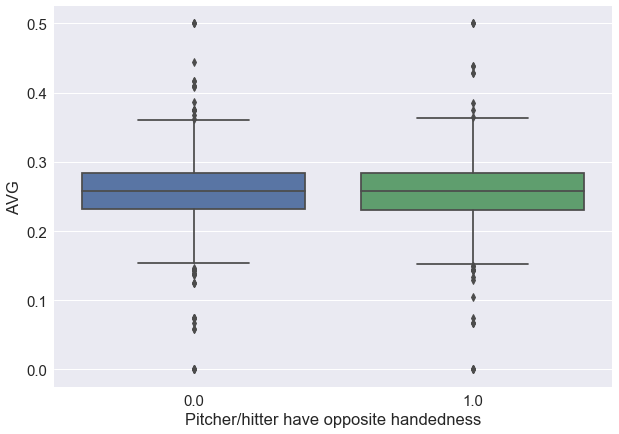

In [140]:
plt.figure(figsize=(10, 7))
ax = sns.boxplot(x = "pitcher_hitter_opposite_hand", y = "avg", data=hits)
ax.set(xlabel="Pitcher/hitter have opposite handedness", ylabel="AVG")
plt.show()

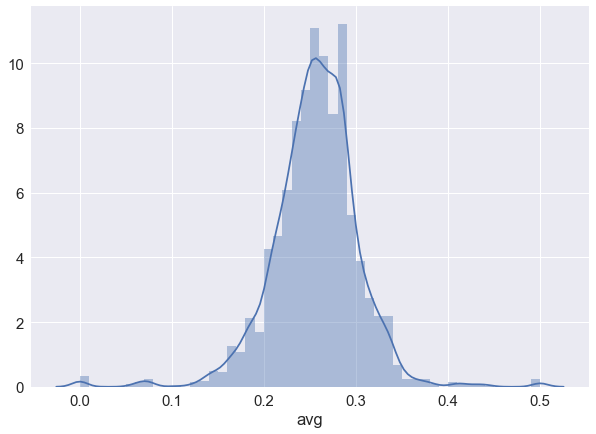

In [141]:
plt.figure(figsize=(10, 7))
sns.distplot(hits['avg'])

## Logistic Regression

In [142]:
logreg = LogisticRegression(penalty='l2').fit(data_train, labels_train)

In [143]:
np.mean(logreg.predict(data_train) == labels_train)

0.7650688182249644

In [144]:
np.mean(logreg.predict(data_val) == labels_val)

0.7324478178368121

In [145]:
hits.take(data_val.take(np.argsort(logreg.predict_proba(data_val)[:, 1])[::-1][:20]).index)['Name']

270      Jonathan Schoop
848     Aristides Aquino
512         Jesse Winker
515          Jose Peraza
288     Ronald Acuna Jr.
2556         Luis Arraez
510     Aristides Aquino
2364        Kevin Newman
439       Bryan Reynolds
2422           Jon Berti
426        Bryan Holaday
110        Cam Gallagher
2222          Matt Olson
1327      Matt Carpenter
2454       Anthony Rizzo
1590       Hunter Dozier
219             Ian Happ
2259         Roman Quinn
658           Alex Avila
1926          Jose Osuna
Name: Name, dtype: object

In [146]:
hits_test = pd.read_csv("data/player_stats/player_stats_{}.csv".format(today))
hits_test.head()

,Name,ID,Team,gamesPlayed,groundOuts,runs,doubles,triples,homeRuns,strikeOuts,...,walksPer9Inn_p5G,whip_p5G,winPercentage_p5G,atBats_h2h,avg_h2h,hits_h2h,obp_h2h,ops_h2h,slg_h2h,pitcher_hitter_opposite_hand
0,Adam Haseley,656514,143,28.0,33.0,14.0,6.0,0.0,3.0,24.0,...,2.25,0.96,0.67,2.0,0.000,0.0,0.000,0.000,0.000,1.0
1,Andrew Knapp,595284,143,59.0,22.0,10.0,4.0,0.0,1.0,33.0,...,2.25,0.96,0.67,0.0,0.000,0.0,0.000,0.000,0.000,1.0
2,Brad Miller,543543,143,49.0,20.0,12.0,3.0,1.0,4.0,26.0,...,2.25,0.96,0.67,0.0,0.000,0.0,0.000,0.000,0.000,1.0
3,Bryce Harper,547180,143,120.0,94.0,72.0,30.0,0.0,25.0,141.0,...,2.25,0.96,0.67,3.0,0.667,2.0,0.667,1.334,0.667,1.0
4,Cesar Hernandez,514917,143,120.0,140.0,53.0,23.0,3.0,8.0,69.0,...,2.25,0.96,0.67,3.0,0.000,0.0,0.000,0.000,0.000,1.0


In [147]:
data_test = hits_test.iloc[:, 3:]

In [148]:
hits_test.take(np.argsort(logreg.predict_proba(data_test)[:, 1])[::-1][:15])['Name']

98              Cavan Biggio
120               Brock Holt
11             Scott Kingery
126           Mitch Moreland
132        Anthony Santander
106    Vladimir Guerrero Jr.
340           David Fletcher
34             Victor Robles
131          Xander Bogaerts
312               Will Smith
297              Ketel Marte
166              Tommy Edman
347            Shohei Ohtani
179          Travis d'Arnaud
88              Jose Ramirez
Name: Name, dtype: object

In [149]:
precision_score(labels_val, logreg.predict(data_val))

0.7815126050420168

In [150]:
recall_score(labels_val, logreg.predict(data_val))

0.6763636363636364

In [151]:
f1_score(labels_val, logreg.predict(data_val))

0.7251461988304093

## Gradient Boosted Decision Trees -- AdaBoost

In [152]:
from sklearn.ensemble import AdaBoostClassifier

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [50, 75, 100, 125, 150]}
]

In [38]:
ada_cv = GridSearchCV(AdaBoostClassifier(), param_grid, cv=4)
ada_cv.fit(data_train, labels_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [50, 75, 100, 125, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [39]:
ada_cv.best_params_

{'n_estimators': 100}

In [153]:
boosted_dt = AdaBoostClassifier(n_estimators=100)
boosted_dt.fit(data_train, labels_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)

In [154]:
np.mean(boosted_dt.predict(data_val) == labels_val)

0.7305502846299811

In [155]:
hits_test.take(np.argsort(boosted_dt.predict_proba(data_test)[:, 1])[::-1][:10])['Name']

131         Xander Bogaerts
128           Rafael Devers
149              Joey Votto
68     Nicholas Castellanos
202           Rafael Ortega
8            Logan Morrison
208              Edwin Rios
331            Josh Reddick
326            Alex Bregman
328         George Springer
Name: Name, dtype: object

In [156]:
precision_score(labels_val, boosted_dt.predict(data_val))

0.752851711026616

In [157]:
recall_score(labels_val, boosted_dt.predict(data_val))

0.72

In [158]:
f1_score(labels_val, boosted_dt.predict(data_val))

0.7360594795539033

## Random forests

In [174]:
from sklearn.ensemble import RandomForestClassifier

In [197]:
# Tuning hyperparameters for random forests
# Note that cross-validation is sort of "automatically" done because 
# sklearn's implementation of random forests uses bagging for each 
# estimator -- more details here 
# https://scikit-learn.org/stable/modules/grid_search.html#out-of-bag-estimates

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [4, 10, 20, 30],
    'n_estimators': [50, 75, 100, 125, 150]}
]

In [198]:
rf_cv = GridSearchCV(RandomForestClassifier(), param_grid, cv=4)
rf_cv.fit(data_train, labels_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'criterion': ['gini'], 'max_depth': [20], 'min_samples_leaf': [4, 10, 20, 30], 'n_estimators': [50, 75, 100, 125, 150]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [199]:
best_rf_params = rf_cv.best_params_
best_rf_params

{'criterion': 'gini',
 'max_depth': 20,
 'min_samples_leaf': 4,
 'n_estimators': 50}

The best parameters seem to be a Gini score criterion, a max depth per tree of 20, a minimum of 10 points per leaf node, and 100 estimators.

In [200]:
rf_classifier = RandomForestClassifier(n_estimators=best_rf_params['n_estimators'], criterion=best_rf_params['criterion'], 
                                       max_depth=best_rf_params['max_depth'], min_samples_leaf=best_rf_params['n_estimators'])
rf_classifier.fit(data_train, labels_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=20, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=50,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [201]:
np.mean(rf_classifier.predict(data_val) == labels_val)

0.7438330170777988

In [182]:
predictions = hits_test.take(np.argsort(rf_classifier.predict_proba(data_test)[:, 1])[::-1][:10])[['Name', 'Team']].reset_index().iloc[:, 1:]
predictions.columns = ["name", "team_id"]
predictions["team_name"] = predictions['team_id'].apply(lambda x: statsapi.lookup_team(x)[0]['name'])
predictions["hit_probability"] = np.sort(rf_classifier.predict_proba(data_test)[:, 1])[::-1][:10]
predictions.to_csv("data/predictions/predictions_{}.csv".format(today))

In [183]:
predictions

,name,team_id,team_name,hit_probability
0,David Fletcher,108,Los Angeles Angels,0.924053
1,Jorge Polanco,142,Minnesota Twins,0.905444
2,Danny Santana,140,Texas Rangers,0.871444
3,Miguel Sano,142,Minnesota Twins,0.867475
4,Bryce Harper,143,Philadelphia Phillies,0.857623
5,Xander Bogaerts,111,Boston Red Sox,0.852878
6,George Springer,117,Houston Astros,0.852669
7,Michael Conforto,121,New York Mets,0.846725
8,Shohei Ohtani,108,Los Angeles Angels,0.834135
9,J.T. Realmuto,143,Philadelphia Phillies,0.831640


In [184]:
precision_score(labels_val, rf_classifier.predict(data_val))

0.8129770992366412

In [185]:
recall_score(labels_val, rf_classifier.predict(data_val))

0.7745454545454545

In [186]:
f1_score(labels_val, rf_classifier.predict(data_val))

0.7932960893854749

In [202]:
most_important_features = np.take(hits_test.columns, np.argsort(rf_classifier.feature_importances_))[:25]
list(most_important_features)

['totalBases',
 'homeRuns',
 'sacBunts',
 'caughtStealing',
 'baseOnBalls',
 'pitchesPerInning_p5G',
 'babip',
 'rbi',
 'obp',
 'inningsPitched_p5G',
 'runs',
 'obp_h2h',
 'slg_p15G',
 'runsScoredPer9_p5G',
 'stolenBasePercentage_p5G',
 'strikeoutsPer9Inn_p5G',
 'slg',
 'gamesPlayed',
 'stolenBasePercentage',
 'ops',
 'hitByPitch',
 'ops_p15G',
 'sacFlies',
 'groundOutsToAirouts_p5G',
 'era_p5G']

## K-NN, because why not

In [189]:
from sklearn.neighbors import KNeighborsClassifier

In [190]:
# TODO: tune hyperparameters
knn_clf = KNeighborsClassifier(n_neighbors=7)
knn_clf.fit(data_train, labels_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [191]:
np.mean(knn_clf.predict(data_val) == labels_val)

0.603415559772296

In [192]:
hits_test.take(np.argsort(knn_clf.predict_proba(data_test)[:, 1])[::-1][:10])['Name']

203    Ronald Acuna Jr.
136      Hanser Alberto
55         Kevin Newman
270        Raimel Tapia
263        Wilson Ramos
147       Freddy Galvis
84     Francisco Lindor
217       Danny Santana
32           Matt Adams
102      Randal Grichuk
Name: Name, dtype: object